<a href="https://colab.research.google.com/github/reddyvamshi210-collab/Ham-and-Spam-Mail-detection/blob/main/ANN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
!pip install tensorflow


In [62]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [63]:
## import basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [64]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
## divide the dataset into independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [66]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [67]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [68]:
## feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [69]:
## concatenate thses variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [70]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [71]:
X=pd.concat([X,geography,gender],axis=1)

In [72]:
##splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

X_train ,X_test, y_train, y_test = train_test_split ( X,y,test_size=0.2,random_state=0)

In [73]:
## feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [74]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [75]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [76]:
X_train.shape

(8000, 11)

In [77]:
## now create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [78]:
## Lets initialize the ANN
classifier=Sequential()

In [79]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [98]:
### adding the 1st hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [100]:
## adding the 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [101]:
## adding output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [102]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [103]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [104]:
## early stopping
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [105]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)
#

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8057 - loss: 0.4808 - val_accuracy: 0.8535 - val_loss: 0.3706
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8551 - loss: 0.3734 - val_accuracy: 0.8334 - val_loss: 0.3834
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8295 - loss: 0.4068 - val_accuracy: 0.8519 - val_loss: 0.3664
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8425 - loss: 0.3938 - val_accuracy: 0.8372 - val_loss: 0.3842
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8425 - loss: 0.4016 - val_accuracy: 0.8376 - val_loss: 0.3755
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8434 - loss: 0.3845 - val_accuracy: 0.8410 - val_loss: 0.3980
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8268 - loss: 0.4166 - val_accuracy: 0.8451 - val_loss: 0.3827
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8335 - loss: 0.3975 

In [107]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

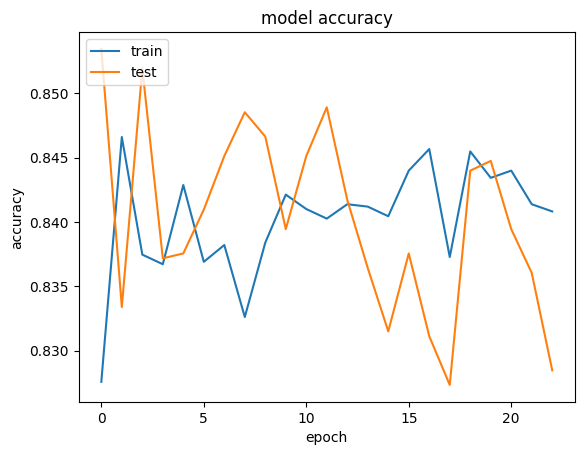

In [108]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

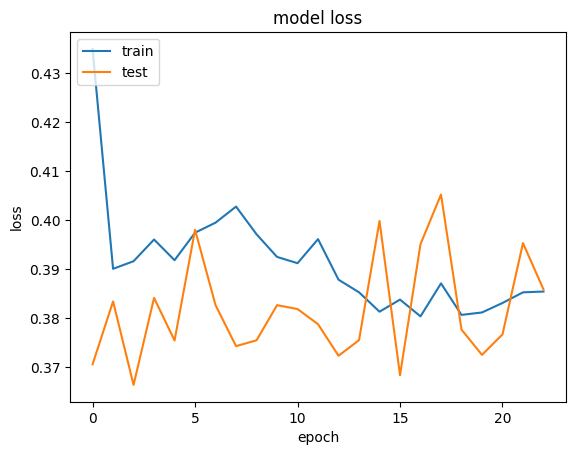

In [109]:
## summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [110]:
## predicting the test set result
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [111]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1585,   10],
       [ 323,   82]])

In [112]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8335

In [113]:
## to get the weights
classifier.get_weights()


[array([[ 2.2324183 ,  0.57255644, -0.39592853,  0.12699594, -1.5966415 ,
         -0.3351644 , -0.02758429, -0.08100054, -0.58638483, -0.37394586,
         -0.9593332 ],
        [-0.8735199 , -3.864382  , -3.7786522 , -1.9568341 ,  3.1503718 ,
          0.54289377, -3.6139722 , -3.1957617 ,  0.5761582 ,  2.5431256 ,
         -1.6943309 ],
        [ 0.06138828,  2.1372209 ,  0.5058172 ,  0.12699084,  0.67913586,
          0.11204032, -0.16110559,  0.61940014,  0.16766152, -0.11901984,
          1.6371192 ],
        [-2.5922658 , -0.717556  , -0.11150394,  0.8697161 , -3.4473732 ,
          0.47591233, -0.72569185, -0.9550341 , -2.997285  ,  0.27734783,
         -1.6750048 ],
        [ 1.3555381 , -0.68742776,  0.7770068 ,  1.6402495 ,  0.35596442,
          4.1680894 ,  0.6786869 , -1.750363  , -4.5041933 , -0.01098423,
         -0.06480916],
        [-1.360993  , -0.45919377,  0.7959796 ,  1.9720168 , -0.33017737,
         -0.5543191 , -1.1535407 ,  2.2862957 , -0.4796388 ,  0.9827236

In [114]:


# Check column order (run once to confirm)
print("Column Order:", X.columns)

# New customer data (must match column order exactly)
new_customer = [[600, 40, 3, 60000,
                 2, 1, 1,
                 50000,
                 1, 0, 1]]

# Scale input using existing scaler
new_customer_scaled = sc.transform(new_customer)

# Predict probability
prediction_prob = classifier.predict(new_customer_scaled)

# Convert to 0 or 1
prediction = (prediction_prob > 0.5)

print("Churn Probability:", prediction_prob[0][0])

if prediction[0][0] == 1:
    print("Customer will churn")
else:
    print("Customer will NOT churn")


Column Order: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
Churn Probability: 0.066031545
Customer will NOT churn
